# Модуль 5. **Інші алгоритми навчання з учителем**

In [392]:
import zipfile
from pathlib import Path
import os

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from colors import GRAY, YELLOW, CYAN, RESET, GRAY_BACK, WHITE

    Розпаковка архіву

In [393]:
zip_file_path = "homework.zip"

# print("unzipping", end="")

with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall()

# print(" done")

unzipping done


    Завантаження даних з файлів *.csv у датасет

In [394]:
# print("loading data", end='')

dataset_path = Path("data")
csv_files = dataset_path.glob("**/*.csv")

df_list = []

for file_path in csv_files:
    df_from_file = pd.read_csv(file_path)
    df_from_file["activity"] = file_path.parent.name
    df_list.append(df_from_file)
df_joint = pd.concat(df_list, ignore_index=True)

# print(" done")

df_joint

loading data done


,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,1.000776,4.616021,8.576031,idle
1,0.718261,4.209007,8.446744,idle
2,-0.909797,-0.282516,9.203311,idle
3,5.099650,0.148441,8.418014,idle
4,1.762132,-0.162806,9.251195,idle
...,...,...,...,...
193855,5.109226,-15.452178,-1.470040,walking
193856,6.373365,-11.741165,-8.226476,walking
193857,3.289633,-9.993398,-0.383072,walking
193858,-2.978387,-3.050213,1.273715,walking


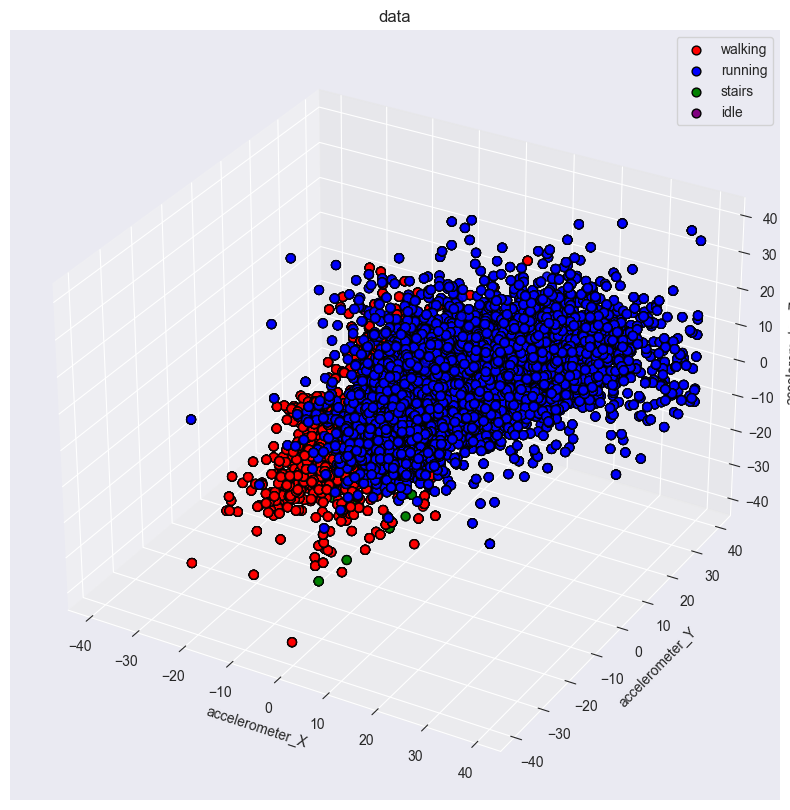

In [395]:
fig = plt.figure(figsize=(12, 10))

ax = plt.axes(projection="3d")
ax.set_xlabel("accelerometer_X")
ax.set_ylabel("accelerometer_Y")
ax.set_zlabel("accelerometer_Z")
ax.set_title("data")

colors = {"walking": "red", "running": "blue", "stairs": "green", "idle": "purple"}

for activity, color in colors.items():
    activity_data = df_joint[df_joint["activity"] == activity]
    ax.scatter3D(
        activity_data["accelerometer_X"],
        activity_data["accelerometer_Y"],
        activity_data["accelerometer_Z"],
        color=color,
        # alpha=0.3,
        label=activity,
        edgecolors="black",
        s=40,
    )

plt.legend()
plt.show()

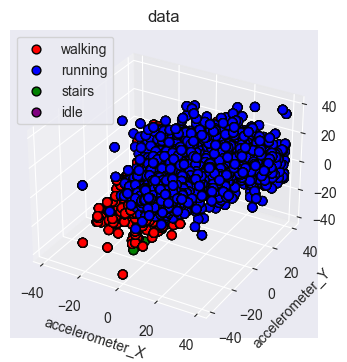

In [396]:
fig = plt.figure(figsize=(8, 4))

ax = plt.axes(projection="3d")
ax.set_xlabel("accelerometer_X")
ax.set_ylabel("accelerometer_Y")
ax.set_zlabel("accelerometer_Z")
ax.set_title("data")

colors = {"walking": "red", "running": "blue", "stairs": "green", "idle": "purple"}
# colors = {"walking": "red"}

for activity, color in colors.items():
    activity_data = df_joint[df_joint["activity"] == activity]
    ax.scatter3D(
        activity_data["accelerometer_X"],
        activity_data["accelerometer_Y"],
        activity_data["accelerometer_Z"],
        color=color,
        # alpha=0.3,
        label=activity,
        edgecolors="black",
        s=40,
    )

plt.legend()
plt.show()

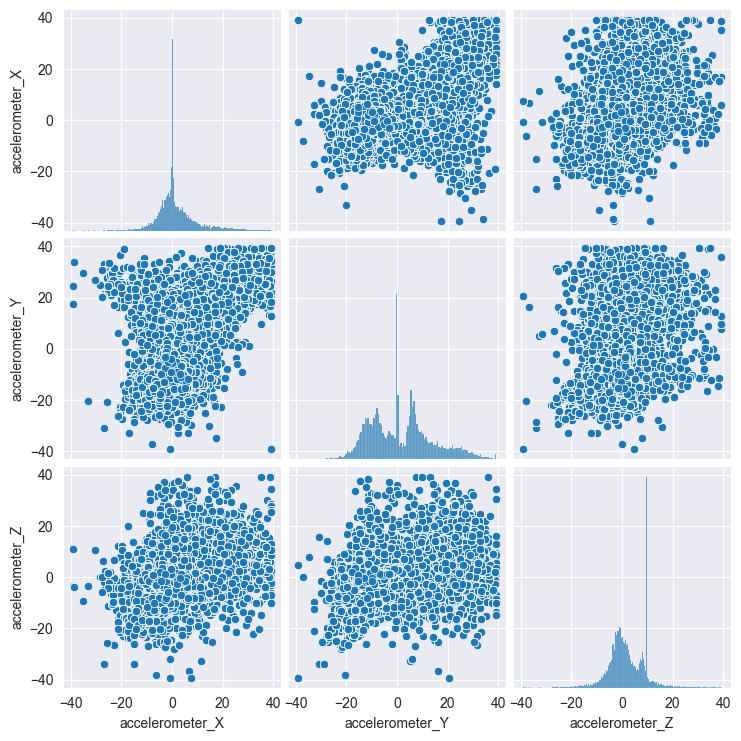

In [397]:
sns.set_style("darkgrid")
features_to_analyse = [
    "accelerometer_X",
    "accelerometer_Y",
    "accelerometer_Z",
]
sns.pairplot(df_joint, vars=features_to_analyse)
plt.show()

In [398]:
df_joint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193860 entries, 0 to 193859
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   accelerometer_X  193860 non-null  float64
 1   accelerometer_Y  193860 non-null  float64
 2   accelerometer_Z  193860 non-null  float64
 3   activity         193860 non-null  object 
dtypes: float64(3), object(1)
memory usage: 5.9+ MB


In [413]:
df_joint["activity"].value_counts()

activity
running    102240
walking     55500
idle        31170
stairs       4950
Name: count, dtype: int64

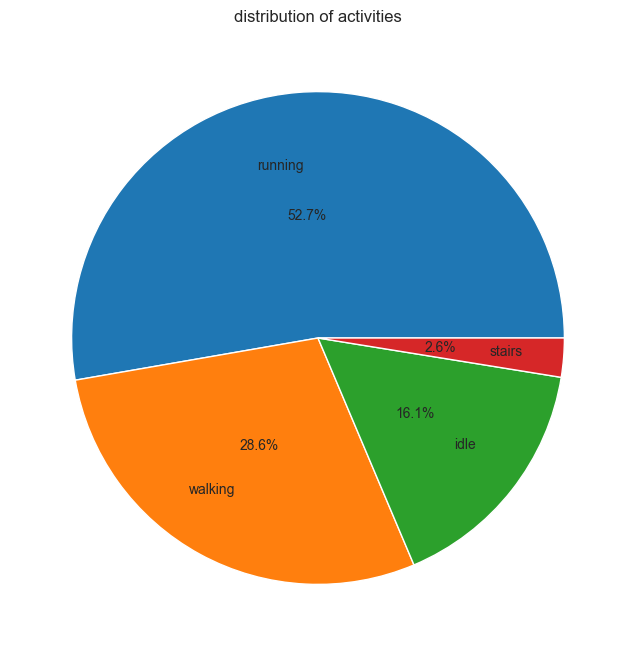

In [400]:
plt.figure(figsize=(8, 8))
plt.pie(
    df_joint["activity"].value_counts(),
    labels=["running", "walking", "idle", "stairs"],
    pctdistance=0.5,
    autopct="%1.1f%%",
    labeldistance=0.7,
)
plt.title("distribution of activities")
plt.show()

In [401]:
df_joint.describe()

,accelerometer_X,accelerometer_Y,accelerometer_Z
count,193860.000000,193860.000000,193860.000000
mean,1.923550,1.598343,1.804896
std,8.404867,12.474041,7.191590
min,-39.188293,-39.188293,-39.188293
25%,-2.494758,-8.327033,-2.494758
50%,0.248997,-0.009577,0.905008
75%,4.668694,8.671799,7.187394
max,39.188293,39.188293,39.188293


    Нормалізація за допомогою MinMaxScaler

In [414]:
columns_to_normalize = ["accelerometer_X", "accelerometer_Y", "accelerometer_Z"]

scaler = StandardScaler()
# scaler = MinMaxScaler()

df_joint[columns_to_normalize] = scaler.fit_transform(df_joint[columns_to_normalize])

df_joint

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,-0.109791,0.241917,0.941538,idle
1,-0.143404,0.209288,0.923560,idle
2,-0.337109,-0.150782,1.028762,idle
3,0.377889,-0.116234,0.919565,idle
4,-0.019205,-0.141185,1.035420,idle
...,...,...,...,...
193855,0.379029,-1.366884,-0.455385,walking
193856,0.529435,-1.069384,-1.394879,walking
193857,0.162535,-0.929271,-0.304241,walking
193858,-0.583227,-0.372659,-0.073862,walking


In [415]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    df_joint.drop("activity", axis=1), df_joint["activity"], train_size=0.2, test_size=0.2, random_state=56
)

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

        idle       0.96      0.98      0.97      6289
     running       0.93      0.90      0.92     20593
      stairs       1.00      0.00      0.01       980
     walking       0.80      0.90      0.85     10910

    accuracy                           0.89     38772
   macro avg       0.92      0.70      0.68     38772
weighted avg       0.90      0.89      0.88     38772

Accuracy: 0.8929639946353038

Random Forest Classification Report:
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6289
     running       0.99      1.00      1.00     20593
      stairs       0.99      0.91      0.95       980
     walking       0.99      0.99      0.99     10910

    accuracy                           0.99     38772
   macro avg       0.99      0.97      0.98     38772
weighted avg       0.99      0.99      0.99     38772

Accuracy: 0.9930877953162076


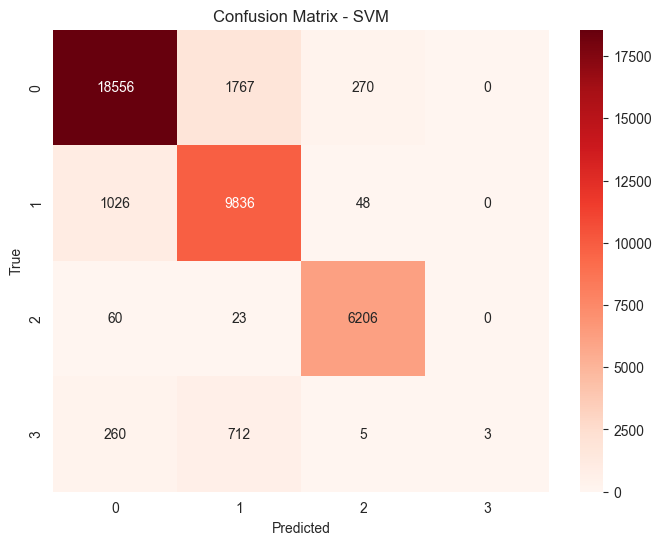

In [404]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

svm_cm = confusion_matrix(y_test, svm_predictions, labels=["running", "walking", "idle", "stairs"])

plt.figure(figsize=(8, 6))
sns.heatmap(
    data=svm_cm,
    annot=True,
    fmt="d",
    cmap="Reds",
    # xticklabels=label_encoder.classes_,
    # yticklabels=label_encoder.classes_,
    # xticklabels=False,
    # yticklabels=False,
)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

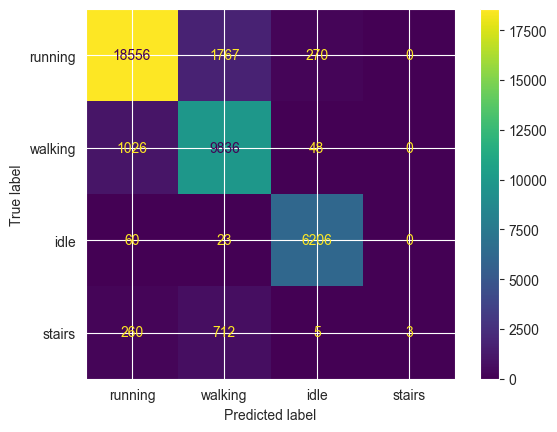

In [416]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, svm_predictions, normalize="all")
cmd = ConfusionMatrixDisplay(
    svm_cm, display_labels=["running", "walking", "idle", "stairs"]
)
cmd.plot()

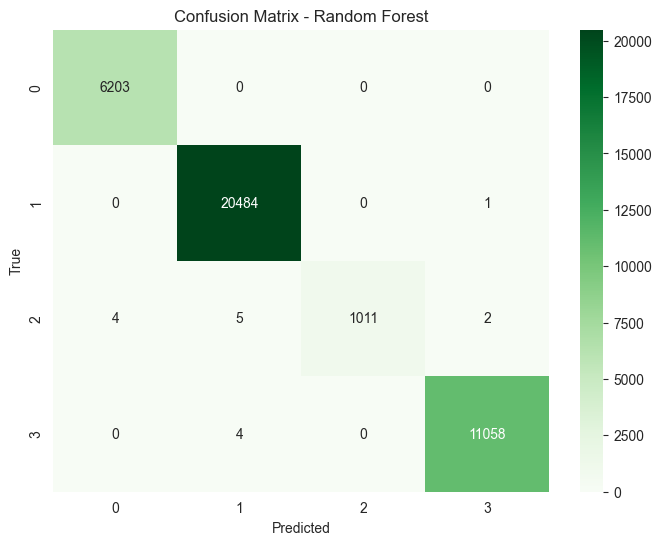

In [ ]:
rf_cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(
    rf_cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    # xticklabels=label_encoder.classes_,
    # yticklabels=label_encoder.classes_,
)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()